In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()


Text(0.5, 1.0, 'Precipitation (Inches) in Hawaii from 2016-08-23 to 2017-08-23')

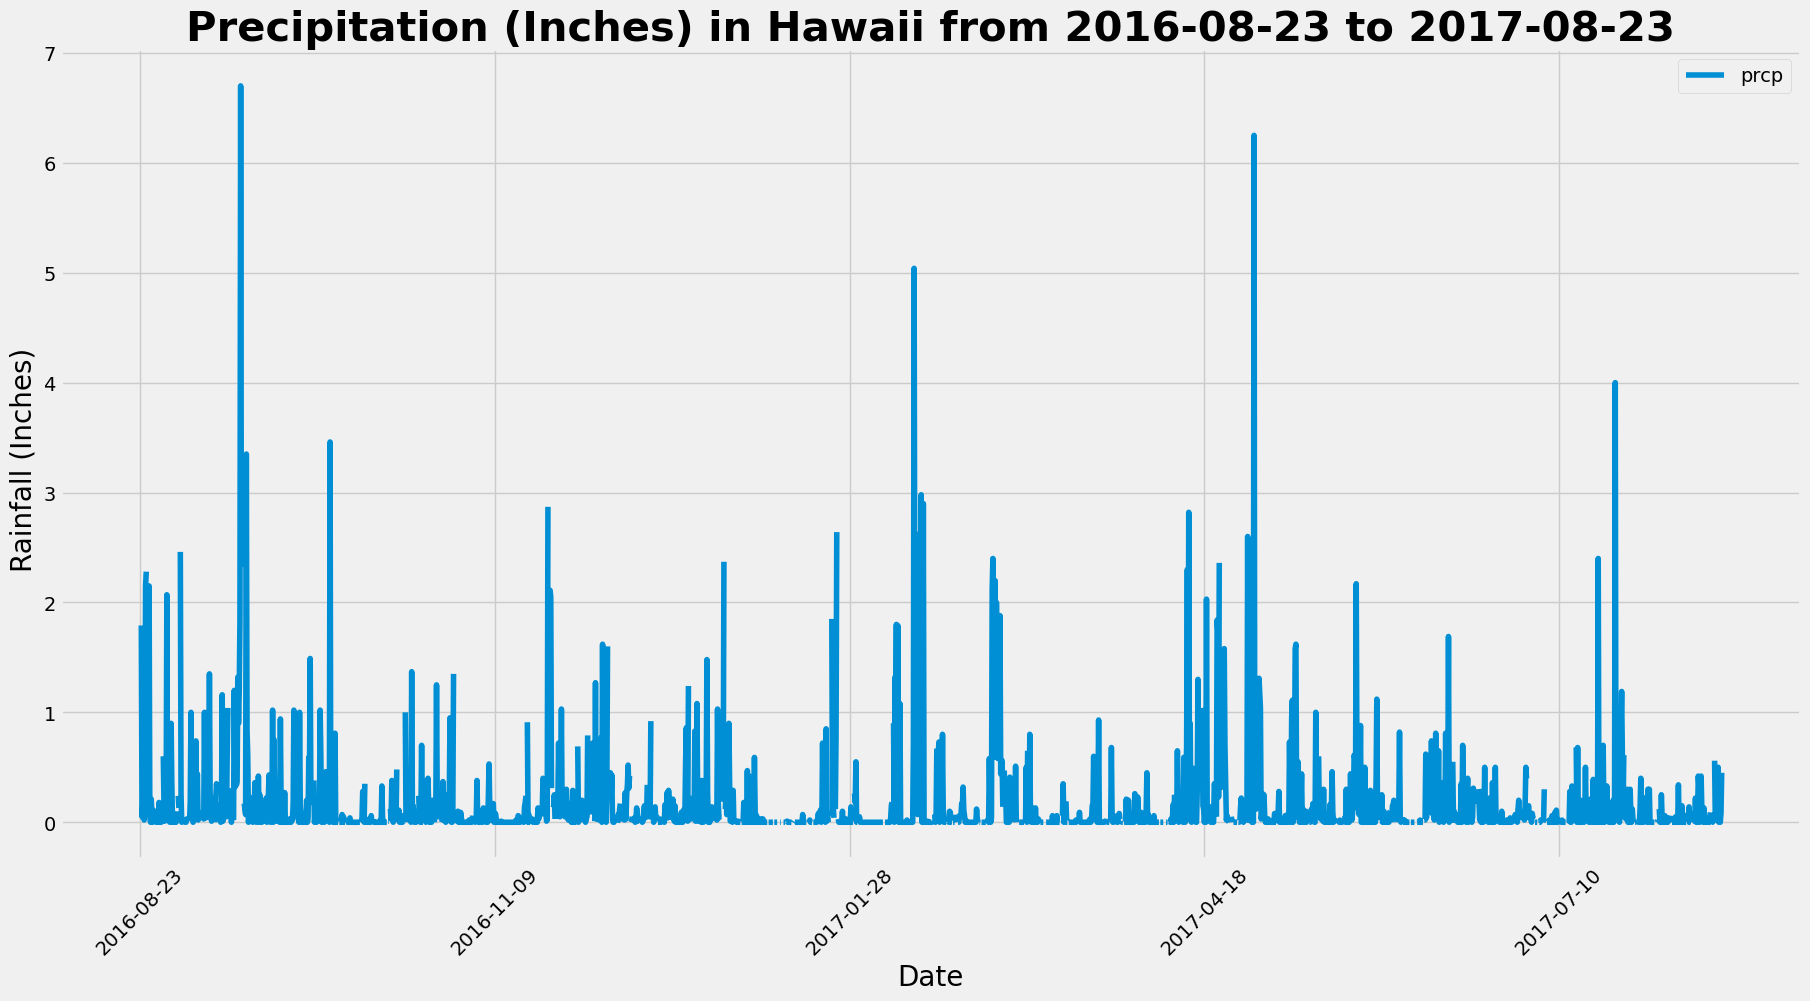

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date= dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23') \
                                                              .filter(Measurement.date<='2017-08-23') \
                                                              .all()
prcp_query


# Save the query results as a Pandas DataFrame and set the index to the date column

year_df=pd.DataFrame(prcp_query,columns=['date','prcp'])

year_df=year_df.set_index('date')

year_df.head()


# Sort the dataframe by date

year_df = year_df.sort_values(by='date')

year_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

year_df.plot(figsize=(20, 10), rot=45)

# formatting table
plt.xlabel('Date', fontsize=20)
plt.ylabel("Rainfall (Inches) ",fontsize=20)
plt.title(f"Precipitation (Inches) in Hawaii from {query_date} to 2017-08-23",fontsize=30, fontweight = 'bold')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stations = sqlalchemy.select([Measurement.station,sqlalchemy.func.count(Measurement.station)]).group_by(Measurement.station) \
                     .order_by(func.count(Measurement.station).desc())

station_list = engine.execute(stations).fetchall()

for station in station_list:
    print(station)

# List the stations and the counts in descending order.

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#lowest temperature
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(lowest_temp)

#highest temperature
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(highest_temp)

#average temperature
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# last 12 months data
station_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>='2016-08-23') \
                                                              .filter(Measurement.date<='2017-08-23') \
                                                              .filter(Measurement.station=='USC00519281') \
                                                              .all()

station_data_df=pd.DataFrame(station_data)

station_data_df.dropna()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


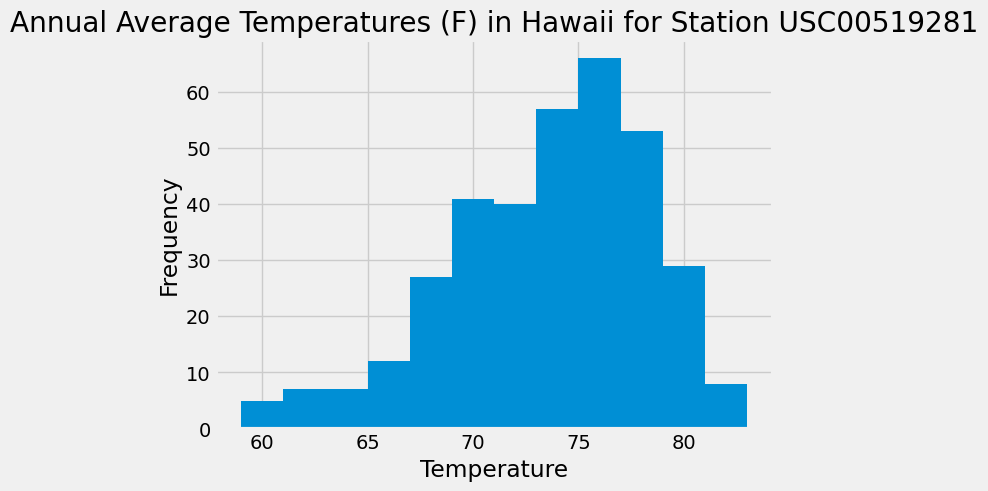

In [17]:
# Histogram
station_data_df.hist('tobs', bins=12)

plt.title('Annual Average Temperatures (F) in Hawaii for Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


plt.show()

# Close session

In [18]:
# Close Session
session.close()